In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from math import pi, sin, sqrt
from multiprocessing import Pool, cpu_count
rc('text', usetex=True)

In [3]:
N = 1000                  # 1MHz is periodic to 1000 samples if Fsamp = 1GHz
w1, w2, w3 = 80, 81, 82   # Effectively MHz

n = np.linspace(0, 1, 1000)

n1 = np.multiply(n, w1)
n2 = np.multiply(n, w2)
n3 = np.multiply(n, w3)

wav3 = np.sin(n3)

def rat(p):
    p1, p2 = p
    wav1 = np.sin(np.add(n1, p1))
    wav2 = np.sin(np.add(n2, p2))
    
    dat = wav1 + wav2 + wav3
    peak = dat.max()
    rms = sqrt(dat.dot(dat) / N)
    return rms / peak

def rat_plot(p):
    p1, p2 = p
    wav1 = np.sin(np.add(n1, p1))
    wav2 = np.sin(np.add(n2, p2))
    
    return wav1 + wav2 + wav3

In [4]:
phases = np.linspace(-2*pi, 2*pi, 100)
workers = Pool(processes=cpu_count())

results = []

for p1 in phases: 
    args = [(p1, p2) for p2 in phases]
    results.append(workers.map(rat, args))

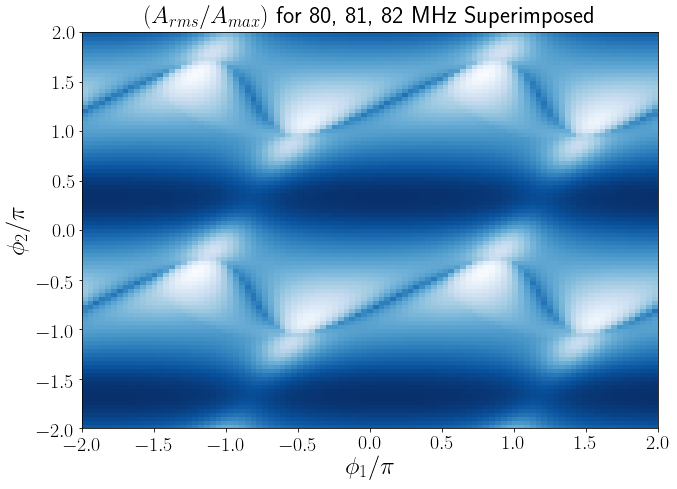

In [35]:
npi = np.linspace(-2, 2, 100)

plt.figure(figsize=(8,5))
plt.pcolor(npi, npi, results, cmap='Blues')
plt.title(r"$(A_{rms} / A_{max})$ for 80, 81, 82 MHz Superimposed", fontsize=24)
plt.xlabel("$\phi_1 / \pi$", fontsize=25)
plt.ylabel("$\phi_2 / \pi$", fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplots_adjust(top = 1.1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)

plt.savefig("phase_map.png", bbox_inches = 'tight',
    pad_inches = 0)

plt.show()